<a href="https://colab.research.google.com/github/sohdacafe/cheat_sheet/blob/main/calif_house_data_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [44]:
file_name = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_name)
df = df.iloc[0:200, :] # dfが大きすぎるので500行だけ抽出
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
195,-116.38,34.20,14.0,4985.0,1238.0,2517.0,954.0,2.0674,65000.0
196,-116.38,34.10,6.0,2104.0,348.0,841.0,320.0,4.1458,116300.0
197,-116.38,33.74,7.0,17579.0,3479.0,3581.0,1820.0,4.0840,194500.0
198,-116.38,33.73,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,134500.0


In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-115.706500,33.383350,20.595000,2390.825000,531.780000,1222.575000,394.310000,2.603531,82276.000000
std,0.516894,0.603222,9.342773,2867.886446,599.971416,1050.570343,359.797184,1.311810,46034.055823
min,-116.380000,32.640000,2.000000,44.000000,18.000000,29.000000,15.000000,0.857100,25000.000000
25%,-116.200000,32.810000,15.000000,1087.750000,221.000000,578.500000,185.000000,1.715350,60750.000000
50%,-115.590000,33.345000,19.000000,1566.000000,353.000000,909.000000,296.500000,2.211200,69250.000000
75%,-115.517500,33.720000,27.000000,2480.500000,567.750000,1406.250000,464.500000,3.210275,92075.000000
max,-114.310000,36.000000,48.000000,19107.000000,3923.000000,5525.000000,1926.000000,10.294800,382400.000000


In [46]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.148600,0.279375,-0.287293,-0.285862,-0.238792,-0.271433,-0.198182,-0.294138
latitude,-0.148600,1.000000,-0.050020,0.224404,0.246817,0.083253,0.165480,-0.025895,-0.016511
housing_median_age,0.279375,-0.050020,1.000000,-0.296298,-0.267827,-0.155786,-0.212962,-0.273794,-0.321530
total_rooms,-0.287293,0.224404,-0.296298,1.000000,0.981128,0.668500,0.867652,0.322767,0.540233
total_bedrooms,-0.285862,0.246817,-0.267827,0.981128,1.000000,0.709964,0.891667,0.202500,0.430557
population,-0.238792,0.083253,-0.155786,0.668500,0.709964,1.000000,0.909471,0.034296,0.172653
households,-0.271433,0.165480,-0.212962,0.867652,0.891667,0.909471,1.000000,0.126108,0.312297
median_income,-0.198182,-0.025895,-0.273794,0.322767,0.202500,0.034296,0.126108,1.000000,0.750208
median_house_value,-0.294138,-0.016511,-0.321530,0.540233,0.430557,0.172653,0.312297,0.750208,1.000000


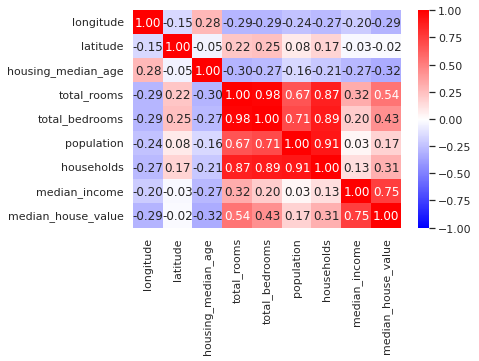

In [47]:
sns.heatmap(df.corr(), annot=True, cmap='bwr', fmt='.2f', vmax=1, vmin=-1, center=0)

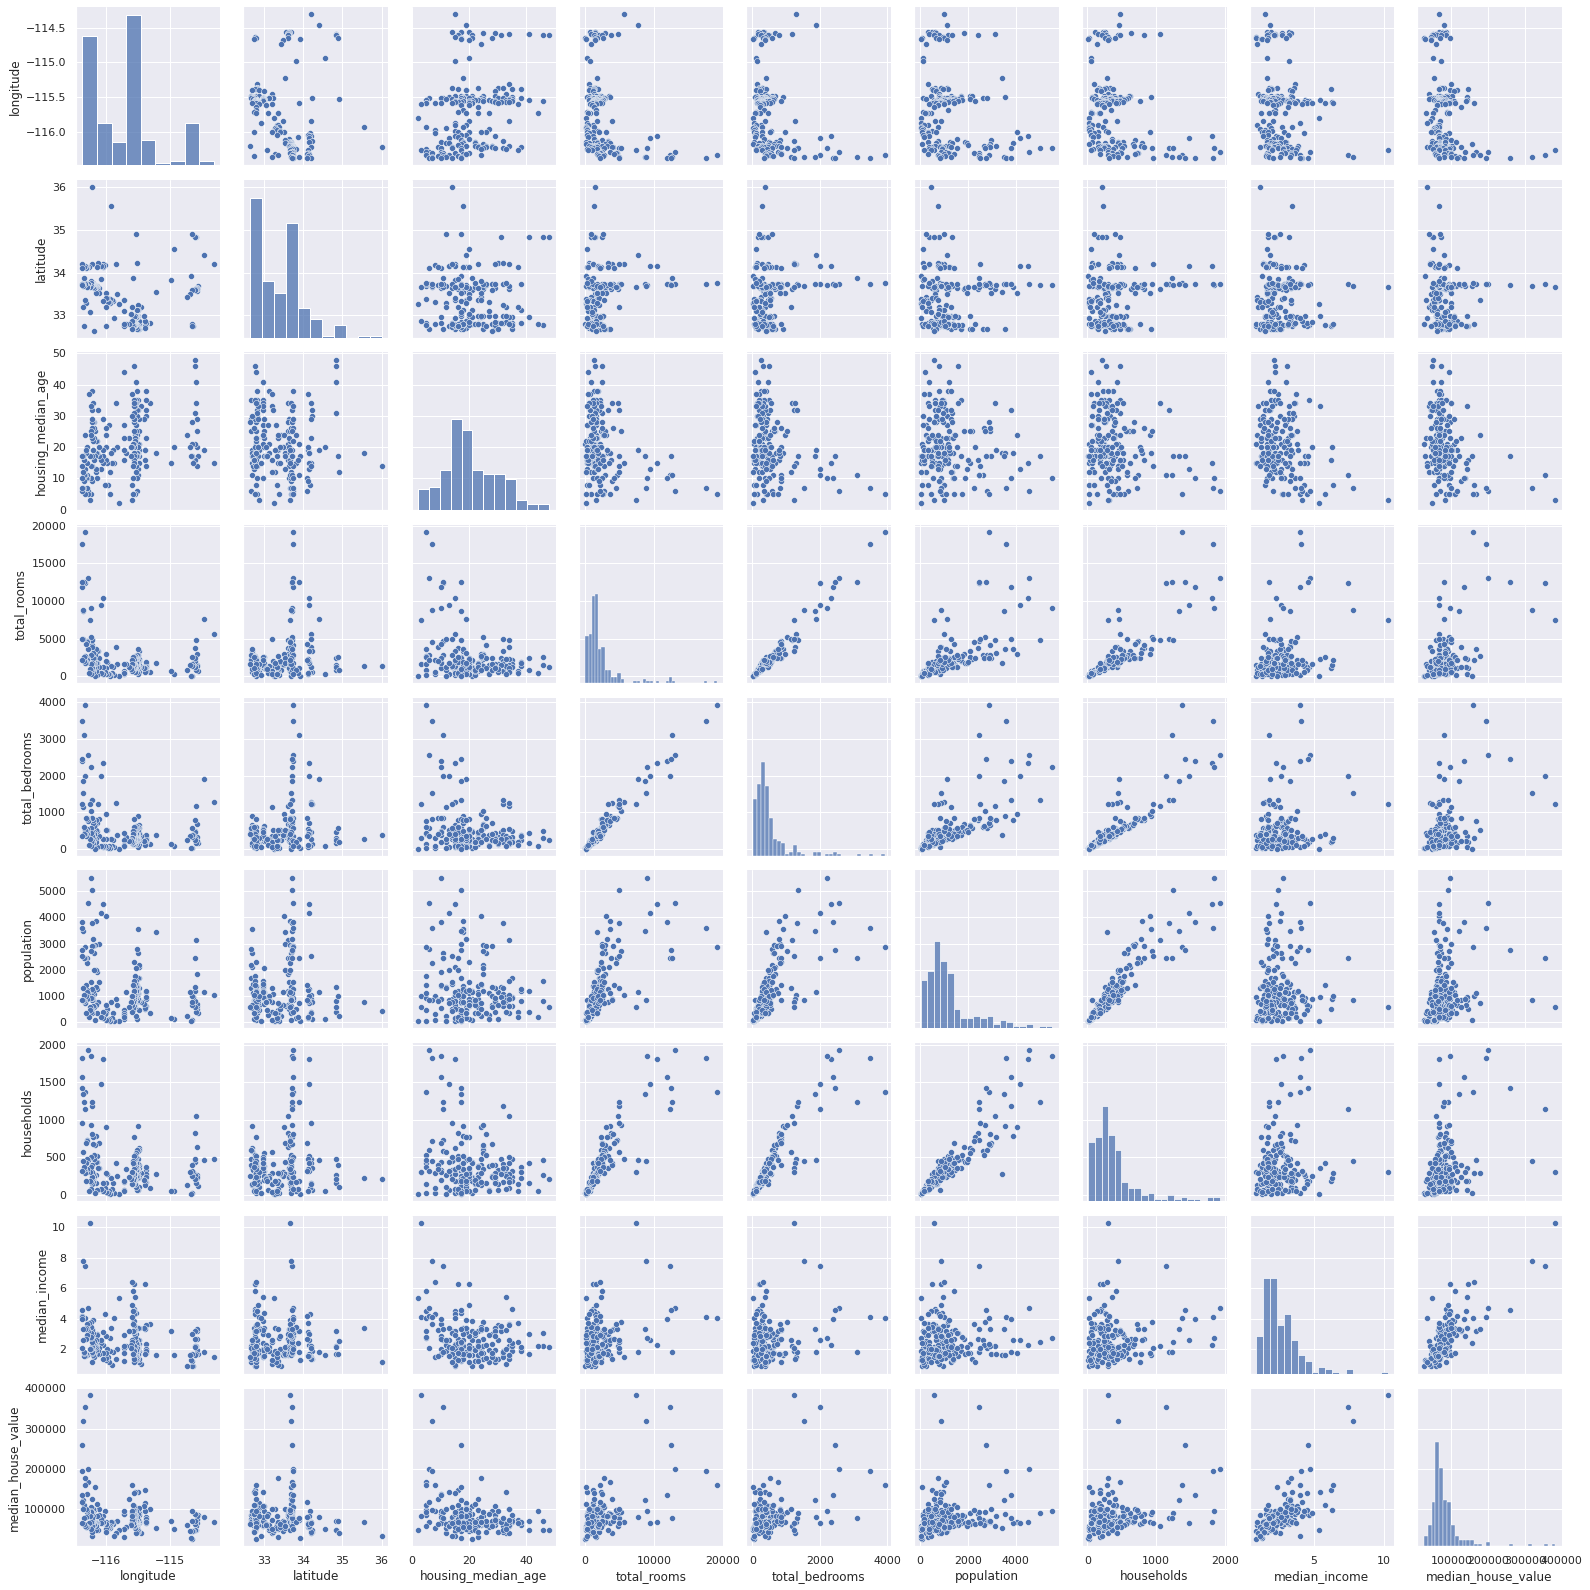

In [48]:
sns.pairplot(df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


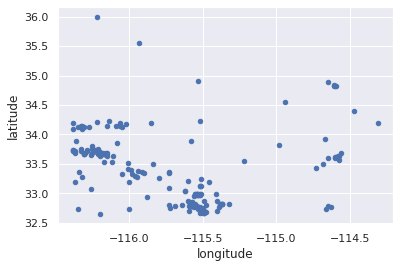

In [49]:
df.plot.scatter('longitude', 'latitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


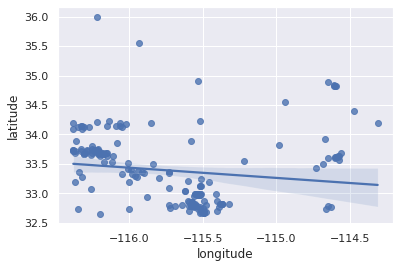

In [50]:
sns.regplot(df['longitude'], df['latitude'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


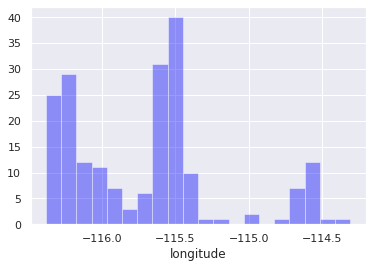

In [51]:
sns.distplot(df['longitude'], kde=False, bins=20, color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


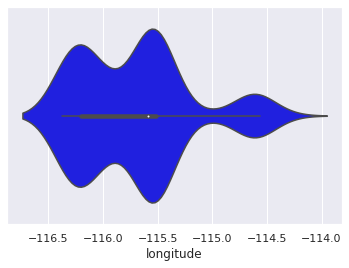

In [52]:
sns.violinplot(df['longitude'], kde=False, bins=20, color="blue")

In [53]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [65]:
df_mhu = df[df['median_house_value'] > 80000]
df_mhl = df[df['median_house_value'] < 80000]

In [66]:
df_mhu.shape, df_mhl.shape

((76, 10), (124, 10))

In [67]:
# 新しいカラムの定義、初期化
df['median_house_value_cat'] = None
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_cat
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,None
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,None
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,None
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,None
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,None
...,...,...,...,...,...,...,...,...,...,...
195,-116.38,34.20,14.0,4985.0,1238.0,2517.0,954.0,2.0674,65000.0,None
196,-116.38,34.10,6.0,2104.0,348.0,841.0,320.0,4.1458,116300.0,None
197,-116.38,33.74,7.0,17579.0,3479.0,3581.0,1820.0,4.0840,194500.0,None
198,-116.38,33.73,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,134500.0,None


In [69]:
# median_house_valueの値を基にカテゴリ分け、値を代入
df.loc[df['median_house_value'] >80000, 'median_house_value_cat'] = 'mhu'
df.loc[df['median_house_value'] <80000, 'median_house_value_cat'] = 'mhl'

In [70]:
# カテゴリ分け毎の平均値算出
df.groupby('median_house_value_cat')['median_house_value'].mean()

median_house_value_cat
mhl     60369.354839
mhu    118018.421053
Name: median_house_value, dtype: float64

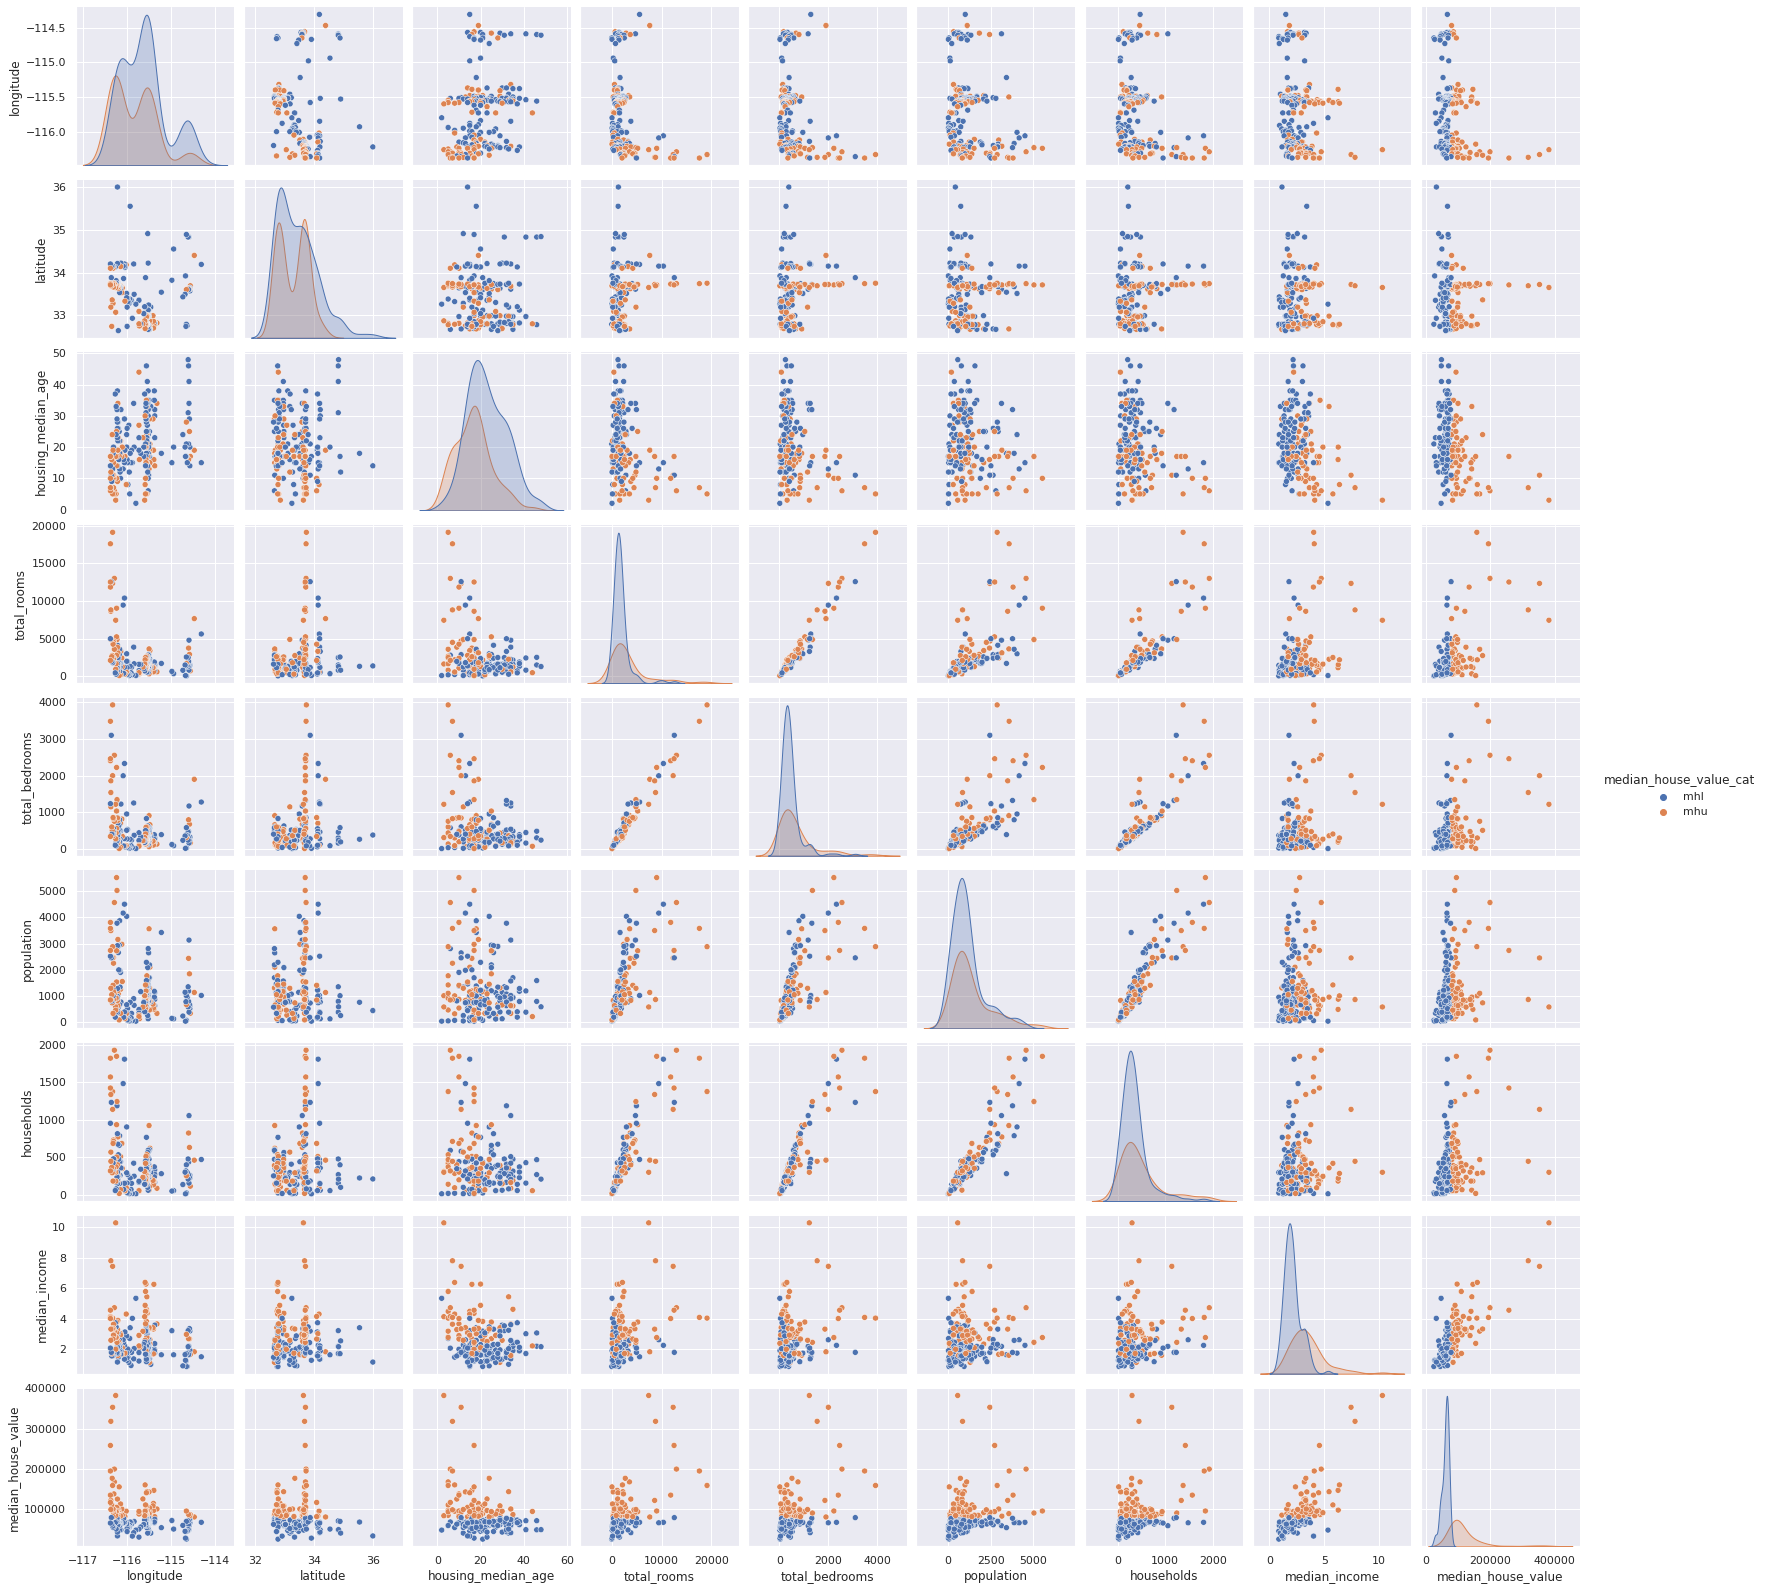

In [71]:
sns.pairplot(data=df, hue = 'median_house_value_cat')